# Day 1

This year I'm trying out using vscode ipython integration (so there'd be function signature hints) and poetry for packaging.

Ugly code is ugly, but am too lazy to clean up.

In [264]:
from aocd import get_data
data = get_data(day=1, year=2023, block=True)
lines = data.split("\n")
v = []
for l in lines:
  first = None
  last = None
  for c in l:
    if c in '0123456789':
      if first is None:
        first = int(c)
      last = int(c)
  num = first * 10 + last
  v.append(num)
sum(v)

55208

In [265]:
from aocd import get_data

data = get_data(day=1, year=2023, block=True)

# data = """two1nine
# eightwothree
# abcone2threexyz
# xtwone3four
# 4nineeightseven2
# zoneight234
# 7pqrstsixteen"""

lines = data.split("\n")
v = []

numbers = {
  'one': 1,
  'two': 2,
  'three': 3,
  'four': 4,
  'five': 5,
  'six': 6,
  'seven': 7,
  'eight': 8,
  'nine': 9,
  'zero': 0
}

for l in lines:
  # (idx, value)
  firstnum = (None, None)
  lastnum = (None, None)

  for num in numbers:
    idx = l.find(num)
    if idx >= 0:
      if firstnum[0] is None or firstnum[0] > idx:
        firstnum = (idx, numbers[num])
    idx = l.find(str(numbers[num]))
    if idx >= 0:
      if firstnum[0] is None or firstnum[0] > idx:
        firstnum = (idx, numbers[num])
    idx2 = l.rfind(str(numbers[num]))
    if idx2 >= 0:
      if lastnum[0] is None or lastnum[0] < idx2:
        lastnum = (idx2, numbers[num])
    idx2 = l.rfind(num)
    if idx2 >= 0:
      if lastnum[0] is None or lastnum[0] < idx2:
        lastnum = (idx2, numbers[num])
  v.append(firstnum[1] * 10 + lastnum[1])
sum(v)

54578

# Day 2

Boring string parsing problems =_=

In [266]:
# Start time: Sat  2 Dec 2023 20:51:50 AEDT

from aocd import get_data
data = get_data(day=2)

rgb = (12, 13, 14)
s = 0
for line in data.split("\n"):
    num, games = line.split(": ")
    n = int(num.replace("Game ", ""))
    ok = True
    for game in games.split("; "):
        for cubes in game.split(", "):
            count, colour = cubes.split(" ")
            count = int(count)
            if colour == 'red' and count > rgb[0]:
                ok = False
            if colour == 'green' and count > rgb[1]:
                ok = False
            if colour == 'blue' and count > rgb[2]:
                ok = False
    if ok:
        s += n
s

1734

In [267]:
from aocd import get_data
data = get_data(day=2)

rgb = (12, 13, 14)
s = 0
for line in data.split("\n"):
    num, games = line.split(": ")
    n = int(num.replace("Game ", ""))
    maxr, maxg, maxb = (0, 0, 0)
    for game in games.split("; "):
        for cubes in game.split(", "):
            count, colour = cubes.split(" ")
            count = int(count)
            if colour == 'red' and count > maxr:
                maxr = count
            if colour == 'green' and count > maxg:
                maxg = count
            if colour == 'blue' and count > maxb:
                maxb = count
    pwr = maxr * maxg * maxb
    s += pwr
s

70387

# Day 3

Totally misunderstood the question due to speed reading. I thought each digit was a separate number.

Part 2 tripped me up in that multiple digits of the same number could be adjacent to a `*`, so I was double counting when looping adjacency for every digit. Was close to get it working but was running very late for a catch up and had to come back much later to finish it.

VS Code code completion/syntax highlighting seem very buggy for ipynb files.

In [268]:
import re
from aocd import get_data
from field import Field
from marker import Marker

data = get_data(day=3)
f = Field(data)

result = 0
for y, line in enumerate(data.split("\n")):
  # use regex to find position of all numbers
  for m in re.finditer("(\d+)", line):
    part_num = int(m.group())
    is_part_num = False
    # loop all the positions of the number    
    for xx in range(*m.span()):
      for adjpos in Marker((xx, y)).adjdiag():
        v = f.get(*adjpos, oob_none=True)
        if v is not None and not (v in '0123456789') and v != '.':
          is_part_num = True
    if is_part_num:
      result += part_num
    
result

536576

In [269]:
import re
from aocd import get_data
from field import Field
from marker import Marker
from collections import defaultdict

data = get_data(day=3)
f = Field(data)

# create a dict mapping position_of_symbol(x, y) => set[(position_of_number(x, y), number)]
sym2num = defaultdict(set)
for y, line in enumerate(data.split("\n")):
  for m in re.finditer("(\d+)", line):
    part_num = int(m.group())
    num_pos = (m.span()[0], y)
    for xx in range(*m.span()):
      for adj_pos in Marker((xx, y)).adjdiag():
        v = f.get(*adj_pos, oob_none=True)
        if v is not None and not (v in '0123456789') and v != '.':
          sym2num[adj_pos].add((num_pos, part_num))

# find all '*' next to exactly 2 numbers
result = 0
for pos in f.find('*'):
  nums = sym2num[pos]
  if len(nums) == 2:
    ratio = 1
    for pos, part_num in nums:
      ratio *= part_num
    result += ratio

result

75741499

# Day 4

More convoluted problems that tests language parsing more than coding ability.

TIL `.split()` without a param will split on whitespace.

Still can't get cells of notebook in VS Code to behave properly, and it's really hurting my speeds!!

In [270]:
from aocd import get_data
data = get_data(day=4)
lines = data.split("\n")
  
result = 0
for card in lines:
  card, dat = card.split(": ")
  wins, nums = dat.split(" | ")
  matched = len(set(wins.split()) & set(nums.split()))
  result += (2 ** matched) // 2
result

27454

In [271]:
from aocd import get_data
data = get_data(day=4)
lines = data.split("\n")
  
cards = []
for i, card in enumerate(lines):
  card, dat = card.split(": ")
  wins, nums = dat.split(" | ")
  matched = len(set(wins.split()) & set(nums.split()))
  cards.append(matched)

counts = {}
for i in range(len(cards)):
  counts[i] = 1

for i in range(len(cards)):
  mult = counts[i]
  matches = cards[i]
  for j in range(i + 1, i + matches + 1):
    counts[j] += mult

sum(counts.values())


6857330

# Day 5

There is a bug in the part 2 code, somehow the `min` is zero, and the second least span is the right answer... still can't figure out what the bug is after a few days :(

Would be good to learn `portion` and use interval arithmetic, but am too lazy atm.

In [272]:
# Part 1
data = get_data(day=5)
blocks = data.split("\n\n")
seeds = blocks.pop(0).split()
seeds.pop(0)
seeds = [int(n) for n in seeds]

class Map(object):
  def __init__(self, block):
    self.block = block
    lines = block.split("\n")
    src_to_dst = lines.pop(0).split()[0]
    src, dst = src_to_dst.split("-to-")
    self.src = src
    self.dst = dst
    self.maps = []
    for l in lines:
      dst_range_start, src_range_start, length = [int(n) for n in l.split(" ")]
      self.maps.append((dst_range_start, src_range_start, length))
  
  def map(self, src_num):
    for (dst_range_start, src_range_start, length) in self.maps:
      if src_range_start <= src_num and src_range_start + length > src_num:
        return src_num - src_range_start + dst_range_start
    return src_num
  
mappers = []
for b in blocks:
  m = Map(b)
  mappers.append(m)

def do_map(seed):
  mapped = seed
  for m in mappers:
    mapped = m.map(mapped)
  return mapped
    
min([do_map(s) for s in seeds])

322500873

In [273]:
# Part 2 - I ended up rewriting from scratch

from aocd import get_data
data = get_data(day=5)
blocks = data.split("\n\n")
seeds = blocks.pop(0).split()
seeds.pop(0)
seeds = [int(n) for n in seeds]

maps = []
for block in blocks:
  lines = block.split("\n")
  src_to_dst = lines.pop(0).split()[0]
  src, dst = src_to_dst.split("-to-")
  map_entries = []
  for l in lines:
    dst_range_start, src_range_start, length = [int(n) for n in l.split(" ")]
    map_entries.append((dst_range_start, src_range_start, length))
    map_entries.sort(key=lambda a: a[1])
  maps.append(map_entries)
maps

# map entries
# (dst_range_start, src_range_start, length)

# given a range and sorted map entries by src_range_start, return the list of ranges it maps to in the form of [(start, length)]
def get_mapped_ranges(start, length, map_entries):
  curr = start
  end = start + length
  mapped_ranges = []
  # print('wat', map_entries)
  for (dst_range_start, src_range_start, map_length) in map_entries:
    modifier = dst_range_start - src_range_start
    # print('processing range from', curr, 'to', end, 'against map', (dst_range_start, src_range_start, map_length), modifier)
    src_range_end = src_range_start + map_length
    if end < src_range_start:
      # generate a range, and finish
      # print('span is fully before map range', (curr, end-curr))
      mapped_ranges.append((curr, end - curr))
      return mapped_ranges
    if curr < src_range_start: # generate a range, then skip to src_range_start
      range_len = src_range_start - curr
      # print('span starts before map range, adding', (curr, range_len))
      mapped_ranges.append((curr, range_len))
      curr = src_range_start
    if curr >= src_range_end:
      # curr is after this whole span
      # print('span is after map range')
      continue
    if end <= src_range_end:
      # print('span is entirely in map range', end, src_range_end, (curr + modifier, end - curr))
      mapped_ranges.append((curr + modifier, end - curr))
      # no more remain
      return mapped_ranges
    else:
      # print('span will consume map range', (curr, map_length))
      mapped_ranges.append((curr + modifier, map_length))
      curr = src_range_end
  # add the final span
  mapped_ranges.append((curr, end - curr))
  # print('adding final span', (curr, end-curr))
  return mapped_ranges

def get_all_ranges(ranges, map_entries):
  all_ranges = []
  for start, length in ranges:
    all_ranges += get_mapped_ranges(start, length, map_entries)
  return all_ranges

it = iter(seeds)

ranges = list(zip(it, it))

for map_entries in maps:
  # print('>>>', min([s for (s, l) in ranges]), ranges)
  ranges = get_all_ranges(ranges, map_entries)

# print('===', ranges)

# BUG somehow I'm returning 0 as the min when the correct answer is the next lowest number
sorted([s for (s, l) in ranges])[1]

108956227

# Day 6

This was weirdly so much less effort than Day 5...

In [274]:
from aocd import get_data
from numpy import prod
data = get_data(day=6, block=True)
t, d = data.split("\n")
times = [int(n) for n in t.split(":")[1].split()]
dists = [int(n) for n in d.split(":")[1].split()]

def go(time, dist):
  ways = 0
  for hold in range(time):
    speed = hold
    travel_time = time - hold
    mydist = speed * travel_time
    if mydist > dist:
      ways += 1
  return ways

prod([go(*tt) for tt in zip(times, dists)])

160816

In [275]:
from aocd import get_data
from numpy import prod
data = get_data(day=6, block=True)
t, d = data.split("\n")
t = t.replace(" ", "")
d = d.replace(" ", "")
times = [int(n) for n in t.split(":")[1].split()]
dists = [int(n) for n in d.split(":")[1].split()]

def go(time, dist):
  ways = 0
  for hold in range(time):
    speed = hold
    travel_time = time - hold
    mydist = speed * travel_time
    if mydist > dist:
      ways += 1
  return ways

prod([go(*tt) for tt in zip(times, dists)])

46561107

# Day 7

For part 1 I missed the fact that the card values weren't just the ASCII values for the longest time, so wasn't able to finish before work meetings. Otherwise I thought my approach was pretty good.

In [276]:
from aocd import get_data
from collections import Counter
from functools import cmp_to_key

data = get_data(day=7, block=True)
hands = [(hand, int(bid)) for hand, bid in [l.split() for l in data.split("\n")]]
card_order = "23456789TJQKA" # lowest to highest

def cmp_hands(a, b):
  c = Counter(a)
  s = sorted(c.values(), reverse=True) # 3, 1, 1
  c2 = Counter(b)
  s2 = sorted(c2.values(), reverse=True) # 5
  for (c0, c1) in zip(s, s2): # (3, 5)
    diff = c1 - c0 # 5 - 3 = 2 ie. b > a
    if diff != 0:
      return diff
  for (z0, z1) in zip(list(a), list(b)):
    diff = card_order.index(z1) - card_order.index(z0)
    if diff != 0:
      return diff
  return 0
    
hands.sort(key=cmp_to_key(lambda a, b: cmp_hands(a[0], b[0])), reverse=True)
result = 0
for i, (hand, bid) in enumerate(hands):
  result += (i + 1) * bid
result

253866470

In [277]:
from aocd import get_data
from collections import Counter
from functools import cmp_to_key

data = get_data(day=7, block=True)
hands = [(hand, int(bid)) for hand, bid in [l.split() for l in data.split("\n")]]
card_order = "J23456789TQKA"

def hand_to_counts(hand):
  c = Counter(hand)
  # remove jokers
  jokers = c['J'] if 'J' in c else 0
  c_without_j = dict(c)
  if jokers > 0: 
    del c_without_j['J']
  s = sorted(c_without_j.values(), reverse=True)
  if len(s) > 0:
    s[0] += jokers # add jokers to the most frequent other card, if there are any
  else:
    s = [5] # 5 jokers
  return s

def cmp_hands(a, b):
  s = hand_to_counts(a)
  s2 = hand_to_counts(b)
  for (c0, c1) in zip(s, s2): # (3, 5)
    diff = c1 - c0 # 5 - 3 = 2 ie. b > a
    if diff != 0:
      return diff
  for (z0, z1) in zip(list(a), list(b)):
    diff = card_order.index(z1) - card_order.index(z0)
    if diff != 0:
      return diff
  return 0
    
hands.sort(key=cmp_to_key(lambda a, b: cmp_hands(a[0], b[0])), reverse=True)
result = 0
for i, (hand, bid) in enumerate(hands):
  result += (i + 1) * bid
result

254494947

# Day 8

Even if gut feel based on past AoC problems suggests using LCM to solve this, I'm not convinced it is really a generalised solution without making some assumptions about the input data. I guess the data for nodes ending in Z is tweaked to always loop back to a node that will reach a Z node again at the same intervals.

In [278]:
from aocd import get_data
import re
import networkx as nx

data = get_data(day=8)
# data = """RL

# AAA = (BBB, CCC)
# BBB = (DDD, EEE)
# CCC = (ZZZ, GGG)
# DDD = (DDD, DDD)
# EEE = (EEE, EEE)
# GGG = (GGG, GGG)
# ZZZ = (ZZZ, ZZZ)"""
inst, tree = data.split("\n\n")

tr = {}

for l in tree.split("\n"):
  m = re.match(r"([A-Z]+) = \(([A-Z]+), ([A-Z]+)\)", l)
  if not m:
    raise
  node, left, right = m.groups()
  tr[node] = (left, right)

def execute(node, instructions, dest = 'ZZZ'):
  curr = node
  for n, i in enumerate(instructions):
    if i == 'L':
      curr = tr[curr][0]
    elif i == 'R':
      curr = tr[curr][1]
    else:
      raise
    if curr == dest:
      return n + 1, curr
  return len(instructions), curr

next = 'AAA'
i = 0
while True:
  # print(i, next)
  num, next = execute(next, inst)
  i += num
  if next == 'ZZZ':
    break
i

16409

In [279]:
from aocd import get_data
import re
import networkx as nx
import math

data = get_data(day=8)
# data = """LR

# 11A = (11B, XXX)
# 11B = (XXX, 11Z)
# 11Z = (11B, XXX)
# 22A = (22B, XXX)
# 22B = (22C, 22C)
# 22C = (22Z, 22Z)
# 22Z = (22B, 22B)
# XXX = (XXX, XXX)"""
inst, tree = data.split("\n\n")

tr = {}

for l in tree.split("\n"):
  m = re.match(r"([A-Z0-9]+) = \(([A-Z0-9]+), ([A-Z0-9]+)\)", l)
  if not m:
    raise
  node, left, right = m.groups()
  tr[node] = (left, right)

def get_next(node, step):
  i = inst[step % len(inst)]
  if i == 'L':
    return tr[node][0]
  elif i == 'R':
    return tr[node][1]

starting = [k for k in tr.keys() if k.endswith('A')]

# make some assumptions and see if it works
# we just LCM the distance from each A to the closest Z
def dist(node1):
  dist = 0
  curr = node1
  while True:
    # print(curr)
    curr = get_next(curr, dist)
    dist += 1
    if curr.endswith('Z'):
      return dist

dists = []

for node in starting:
  d = dist(node)
  dists.append(d)

math.lcm(*dists)


11795205644011

# Day 9

An easy day, but didn't get to start until late at night.

In [280]:
from aocd import get_data
data = get_data(day=9)

In [281]:
def go(nums):
    diffs = []
    for i in range(len(nums) - 1):
        diff = nums[i + 1] - nums[i]
        diffs.append(diff)
    return diffs

def proc(nums):
    curr = nums[:]
    code = curr[-1]
    while True:
        curr = go(curr)
        code += curr[-1]
        if all([n == 0 for n in curr]):
            return code

result = 0
for line in data.split("\n"):
    nums = [int(n) for n in line.split()]
    result += proc(nums)

result

1834108701

In [282]:
def go(nums):
    diffs = []
    for i in range(len(nums) - 1):
        diff = nums[i + 1] - nums[i]
        diffs.append(diff)
    return diffs

def proc(nums):
    curr = nums[:]
    firsts = [curr[0]]
    while True:
        curr = go(curr)
        firsts.append(curr[0])        
        if all([n == 0 for n in curr]):
            code = 0
            for n in reversed(firsts):
                code = n - code
            return code

result = 0
for line in data.split("\n"):
    nums = [int(n) for n in line.split()]
    result += proc(nums)

result

993

# Day 10

Was playing Arkham Horror, did not start until late evening again.

Relatively tough day, though the plotting and graphing tools did help. I did a trial-and-error for part 2 to figure out which starting position to floodfill from.

```
| is a vertical pipe connecting north and south.
- is a horizontal pipe connecting east and west.
L is a 90-degree bend connecting north and east.
J is a 90-degree bend connecting north and west.
7 is a 90-degree bend connecting south and west.
F is a 90-degree bend connecting south and east.
. is ground; there is no pipe in this tile.
S is the starting position of the animal; there is a pipe on this tile, but your sketch doesn't show what shape the pipe has.
```

In [283]:
from aocd import get_data
from direction import Direction
import networkx as nx
from field import Field
from marker import Marker

pipe_endpoints = {
    '|': [Direction.N, Direction.S],
    '-': [Direction.W, Direction.E],
    'L': [Direction.N, Direction.E],
    'J': [Direction.N, Direction.W],
    '7': [Direction.S, Direction.W],
    'F': [Direction.S, Direction.E],
}

data = get_data(day=10)
f = Field(data)
G = nx.grid_2d_graph(f.width, f.height)
for pos, v in f.iterate():
    m = Marker(pos)
    if v == '.':
        # no connections
        G.remove_node(pos)
    elif v != 'S':
        endpoints = pipe_endpoints[v]
        for d in range(4):
            # remove all unconnected edges
            if d not in endpoints:
                endpoint_pos = m.relative_pos(d)
                try:
                    G.remove_edge(pos, endpoint_pos)
                except:
                    pass

s_pos = list(f.find('S'))[0]
for loop in list(nx.simple_cycles(G)):
    if s_pos in loop:
        print(len(loop) // 2)

6831


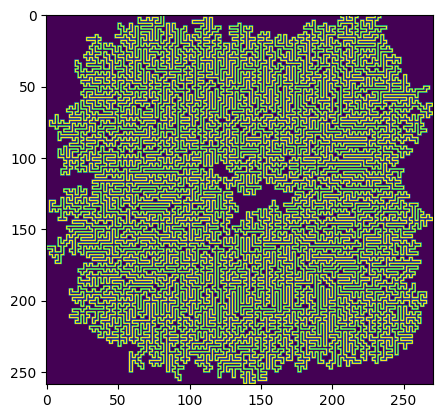

In [284]:
import networkx as nx
from field import Field
from marker import Marker
from utils import plot_xy_list

data = get_data(day=10)
f = Field(data)
G = nx.grid_2d_graph(f.width, f.height)
for pos, v in f.iterate():
    m = Marker(pos)
    if v == '.':
        # no connections
        G.remove_node(pos)
    elif v != 'S':
        endpoints = pipe_endpoints[v]
        for d in range(4):
            # remove all unconnected edges
            if d not in endpoints:
                endpoint_pos = m.relative_pos(d)
                try:
                    G.remove_edge(pos, endpoint_pos)
                except:
                    pass

def get_main_loop():
    s_pos = list(f.find('S'))[0]
    for loop in list(nx.simple_cycles(G)):
        if s_pos in loop:
            return loop, s_pos

main_loop, s = get_main_loop()

# construct a double sized loop from the main loop
doubled_loop = set()
for node in main_loop:
    x, y = node
    doubled_loop.add((x * 2, y * 2))
    for nx, ny in G.neighbors(node):
        doubled_loop.add((2 * x + (nx - x), 2 * y + (ny - y)))

# sanity check
plot_xy_list(doubled_loop)

305

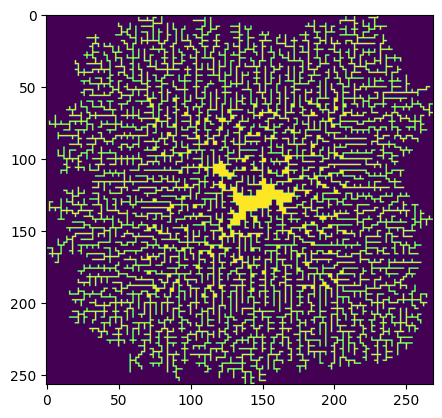

In [285]:
filled = set()
to_fill = [(s[0] * 2 - 1, s[1] * 2 - 1)]

while to_fill:
    pos = to_fill.pop(0)
    if pos in filled:
        continue
    filled.add(pos)
    for adj in Marker(pos).adjacent():
        x, y = adj
        if x < 0 or y < 0 or x // 2 > f.width or y // 2 > f.height:
            continue
        if adj in doubled_loop: # hit a wall
            pass
        else:
            to_fill.append(adj)

inside = 0
for (x, y), v in f.iterate():
    if (x * 2, y * 2) in filled:
        inside += 1

plot_xy_list(filled)
inside

# Day 11

Painful. For part 1 I had a bug where I was increasing the (x, y) values in place as I was looping the empty col/rows which led to a bug when there are consecutive empty rows/cols, which is not present in the test data.

Part 2 is basically a freebie.

In [286]:

from field import Field
from itertools import combinations

data = get_data(day=11)
f = Field(data)

def expand_field(f, modifier):
  empty_rows, empty_cols = set(), set()
  for x in range(f.width):
    is_empty = True
    for y in range(f.height):
      if f.get(x, y) != '.':
        is_empty = False
        break
    # print(col, is_empty)
    if is_empty:
      empty_cols.add(x)
  for y in range(f.height):
    is_empty = True
    for x in range(f.width):
      if f.get(x, y) != '.':
        is_empty = False
        break
    if is_empty:
      empty_rows.add(y)

  galaxies = f.find('#')
  expanded_galaxies = []
  for g in galaxies:
    x, y = g
    modx, mody = 0, 0
    for c in empty_cols:
      if c < x:
        modx += (modifier - 1)
    for r in empty_rows:
      if r < y:
        mody += (modifier - 1)
    expanded_galaxies.append((x + modx, y + mody))
  return expanded_galaxies

ex = expand_field(f, 2)
d = 0
for (x0, y0), (x1, y1) in combinations(ex, 2):
  d += abs(y1 - y0) + abs(x1 - x0)

ex2 = expand_field(f, 1000000)
d2 = 0
for (x0, y0), (x1, y1) in combinations(ex2, 2):
  d2 += abs(y1 - y0) + abs(x1 - x0)

d, d2

(9647174, 377318892554)

# Day 12

I don't know why I thought it was a good idea to do the complete bruteforce approach for part 1 when I knew it wouldn't work for part 2.

Especially when the optimised approach wasn't really that hard after all.

In [287]:
from aocd import get_data
import re

def chk_patterns(patt, nums):
  ok = 0
  qmarks = sum([1 for c in patt if c == '?'])
  patterns = []
  # full bruteforce approach of EVERY permutation
  for i in range(2 ** qmarks):
      mask = list(f"{format(i, f'#0{qmarks + 2}b')}"[2:])
      new_patt = list(patt[:])
      for j, c in enumerate(patt):
        if c == '?':
          new_patt[j] = '.' if mask.pop(0) == '0' else '#'
      nn = ''.join(new_patt)
      patterns.append(nn)
      chunks = re.split(r'\.+', nn)
      x = [len(c) for c in chunks if len(c) > 0]
      if x == nums:
         ok += 1
  return ok

data = get_data(day=12)

v = 0
for l in data.split("\n"):
   patt, nums = l.split(' ')
   v += chk_patterns(patt, [int(n) for n in nums.split(',')])
v

7017

In [288]:
import functools
@functools.cache
def get_matches(patt, nums, left_hashes=0):
  if len(patt) == 0:
    if len(nums) == 0:
      return 1
    if len(nums) == 1 and nums[0] == left_hashes:
      return 1
    return 0
  
  n, next_patt = patt[0], patt[1:]
  numlist = list(nums)
  if len(numlist) == 0:
    if left_hashes > 0 or any([c for c in patt if c == '#']):
      return 0
    return 1 
  next_num = numlist[0]
  if n == '#':
    if left_hashes + 1 <= next_num:
      return get_matches(next_patt, nums, left_hashes + 1)
    else:
      # too long
      return 0
  if n == '.':
    if left_hashes == next_num:
      return get_matches(next_patt, tuple(numlist[1:]), 0)
    elif left_hashes == 0:
      return get_matches(next_patt, tuple(numlist), 0)
    else:
      return 0
  if n == '?':
    a = '#' + next_patt
    b = '.' + next_patt
    x = get_matches(a, nums, left_hashes)
    y = get_matches(b, nums, left_hashes)
    return x + y
  
v = 0
for l in data.split("\n"):
   patt, nums = l.split(' ')
   expatt = (patt + '?') * 5
   expatt = expatt[:-1]
   v += get_matches(expatt, tuple([int(n) for n in nums.split(',')] * 5))
v

527570479489

# Day 13

So far every day I've had meetings at 4pm so there's no hope of being competitive :(

Solved part 1 in the middle of an ideation session :p but I prematurely optimised and had a bug in part 2 (breaking from the loop too early due to it being a valid thing in part 1).

In [289]:
from field import Field
from aocd import get_data

data = get_data(day=13, block=True)
chunks = data.split("\n\n")

def find_mirror(chunk):
  f = Field(chunk)
  for mirror_y in range(f.height - 1):
    # check mirror at mirror_y, mirror_y + 1
    # print('mirror y', mirror_y)
    ok = True
    for dy in range(f.height // 2):
      left_y, right_y = mirror_y - dy, mirror_y + 1 + dy
      if left_y >= 0 and right_y < f.height:
        for x in range(f.width):
          left, right = f.get(x, left_y), f.get(x, right_y)
          # print('wat', (x, left_y), left, (x, right_y), right)
          if left != right:
            # print('no', (x, left_y), left, (x, right_y), right)
            ok = False
            break
        if ok == False:
          break
      if ok == False:
        break
    if ok:      
      return mirror_y, 'y'
    
  for mirror_x in range(f.width - 1):
    # check mirror at mirror_y, mirror_y + 1
    # print('mirror x', mirror_x)
    ok = True
    for dx in range(f.width // 2):
      left_x, right_x = mirror_x - dx, mirror_x + 1 + dx
      if left_x >= 0 and right_x < f.width:
        for y in range(f.height):
          left, right = f.get(left_x, y), f.get(right_x, y)
          if left != right:
            ok = False
            break
        if ok == False:
          break
      if ok == False:
        break
    if ok:
      return mirror_x, 'x'
  raise

s = 0
for chunk in chunks:
  num, axis = find_mirror(chunk)
  if axis == 'y':
    s += (num + 1) * 100
  else:
    s += num + 1
s

37561

In [290]:
from field import Field
chunks = data.split("\n\n")

def find_mirror(chunk):
  f = Field(chunk)
  for mirror_y in range(f.height - 1):
    # check mirror at mirror_y, mirror_y + 1
    # print('mirror y', mirror_y)
    diff = 0
    for dy in range(f.height // 2):
      left_y, right_y = mirror_y - dy, mirror_y + 1 + dy
      if left_y >= 0 and right_y < f.height:
        for x in range(f.width):
          left, right = f.get(x, left_y), f.get(x, right_y)
          # print('wat', (x, left_y), left, (x, right_y), right)
          if left != right:
            # print('no', (x, left_y), left, (x, right_y), right)
            diff += 1
    if diff == 1:      
      return mirror_y, 'y'
    
  for mirror_x in range(f.width - 1):
    # check mirror at mirror_y, mirror_y + 1
    # print('mirror x', mirror_x)
    diff = 0
    for dx in range(f.width // 2):
      left_x, right_x = mirror_x - dx, mirror_x + 1 + dx
      if left_x >= 0 and right_x < f.width:
        for y in range(f.height):
          left, right = f.get(left_x, y), f.get(right_x, y)
          if left != right:
            diff += 1
    if diff == 1:
      return mirror_x, 'x'
  raise

s = 0
for chunk in chunks:
  num, axis = find_mirror(chunk)
  if axis == 'y':
    s += (num + 1) * 100
  else:
    s += num + 1
s

31108

# Day 14

Fugly code is fugly.

Trick for Part 2 is loop detection again. I should've realised this rather than just thinking it will eventually get "stuck" on one state.

I'm terrible at modulo math and ended up reverse engineering from the output of the test case to get the math for the actual solution.

In [291]:
from aocd import get_data
from direction import Direction

data = get_data(day=14)
f = Field(data)

rocks = list(f.find('O'))
rolled_rocks = set()
walls = set(f.find('#'))

# plot_xy_list(rocks)

def roll_rock(rock, d = Direction.N):
  x, y = rock
  # either hit a wall, rock, or 0
  # print('checking', rock)
  if y == 0:
    return rock
  for dy in range(y):
    y0 = y - dy - 1
    # print('...', (x, y0))
    if (x, y0) in rolled_rocks or (x, y0) in walls:
      return (x, y0 + 1)
    if y0 == 0:
      return (x, 0)
    

def roll(d = Direction.N):
  # this assumes rocks are ordered N to S
  for r in rocks:
    rolled = roll_rock(r)
    rolled_rocks.add(rolled)

roll()

s = 0
for x, y in rolled_rocks:
  d = f.height - y
  s += d
s

110128

In [292]:
from direction import Direction

data = get_data(day=14)
f = Field(data)

rocks = set(f.find('O'))
walls = set(f.find('#'))

def roll_rock(rock, rolled_rocks, d = Direction.N):
  x, y = rock
  # either hit a wall, rock, or 0
  # print('checking', rock)
  if d == Direction.N and y == 0:
    return rock
  if d == Direction.S and y == f.height - 1:
    return rock
  if d == Direction.E and x == f.width - 1:
    return rock
  if d == Direction.W and x == 0:
    return rock
  
  if d == Direction.N:
    for dy in range(f.height):
      y0 = y - dy - 1
      if (x, y0) in rolled_rocks or (x, y0) in walls:
        return (x, y0 + 1)
      if y0 == 0:
        return (x, y0)
  
  if d == Direction.S:
    for dy in range(f.height):
      y0 = y + dy + 1
      if (x, y0) in rolled_rocks or (x, y0) in walls:
        return (x, y0 - 1)
      if y0 == f.height - 1:
        return (x, y0)
  
  if d == Direction.E:
    for dx in range(f.width):
      x0 = x + dx + 1
      if (x0, y) in rolled_rocks or (x0, y) in walls:
        return (x0 - 1, y)
      if x0 == f.width - 1:
        return (x0, y)
  
  if d == Direction.W:
    for dx in range(f.width):
      x0 = x - dx - 1
      if (x0, y) in rolled_rocks or (x0, y) in walls:
        return (x0 + 1, y)
      if x0 == 0:
        return (x0, y)
      

def roll_all(rocks, d = Direction.N):
  # this assumes rocks are ordered N to S
  new_rolled = set()
  if d == Direction.N:
    srocks = sorted(rocks, key=lambda r: r[1])
  if d == Direction.W:
    srocks = sorted(rocks, key=lambda r: r[0])
  if d == Direction.S:
    srocks = sorted(rocks, key=lambda r: -r[1])
  if d == Direction.E:
    srocks = sorted(rocks, key=lambda r: -r[0])
  for r in srocks:
    rolled = roll_rock(r, new_rolled, d)
    new_rolled.add(rolled)
  return new_rolled

def cycle(rocks):
  n = rocks
  for d in [Direction.N, Direction.W, Direction.S, Direction.E]:
    n = roll_all(n, d)
  return n

def score(rocks):
  s = 0
  for x, y in rocks:
    d = f.height - y
    # print(d)
    s += d
  return s

i = 0
known_states = {}
scores = {}
while True:
  known_states[tuple(rocks)] = i
  rocks = cycle(rocks)
  i += 1
  if tuple(rocks) in known_states:
    # loop detected
    loop_start = known_states[tuple(rocks)]
    loop_end = i
    loop_len = loop_end - loop_start
    print('loop found from', loop_start, 'to', loop_end)
    sc = scores[(1000000000 - loop_start) % loop_len + loop_start]
    print(sc)
    break
  scores[i] = score(rocks)
  # print(i, score(rocks))


loop found from 177 to 191
103861


# Day 15

adventofenglishcomprehension

pretty hard to focus in the middle of project jam and LVs ><

In [293]:
from aocd import get_data
data = get_data(day=15, block=True)
chunks = data.split(",")

def _hash(s):
  curr = 0
  for c in s:
    ascval = ord(c)
    curr += ascval
    curr *= 17
    curr %= 256
  return curr

s = 0
for chunk in chunks:
  s += _hash(chunk)
s

510273

In [294]:
boxes = {}
for ins in data.split(","):
  if '=' in ins:
    label, num = ins.split("=")
    num = int(num)
    op = '='
  else:
    label = ins.replace("-", "")
    op = '-'
  bucketval = _hash(label)  
  try:
    box = boxes[bucketval]
  except KeyError:
    boxes[bucketval] = []
    box = boxes[bucketval]
  if op == '=':
    found = False
    for i, lens in enumerate(box):
      l, nn = lens
      if l == label:
        box[i] = (label, num)
        found = True
        break
    if not found:
      box.append((label, num))
  else:
    boxes[bucketval] = [lens for lens in box if lens[0] != label]

s = 0
for boxnum in boxes:
  for i, lens in enumerate(boxes[boxnum]):
    label, num = lens
    s += (boxnum + 1) * (i + 1) * num
s

212449

# Day 16

For part 1, I had really stupid bugs where I forgot to use `elif` so it was modifying the direction multiple times when hitting a mirror. And then I also put `==` instead of `=` so it wasn't actually modifying the direction. That stumped me long enough that I wasn't able to finish part 1 before leaving for carols, and had to continue only after getting home late at night.

I know my solution is super unoptimised (part 2 takes > 1 minute to run), but Christmas is meant to be a joyful relaxing time and I really can't be stuffed.

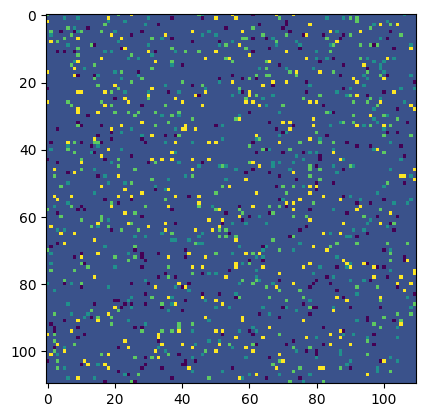

In [295]:
from aocd import get_data
from field import Field
data = get_data(day=16)
f = Field(data)
f.plot()

```
If the beam encounters empty space (.), it continues in the same direction.
If the beam encounters a mirror (/ or \), the beam is reflected 90 degrees depending on the angle of the mirror. For instance, a rightward-moving beam that encounters a / mirror would continue upward in the mirror's column, while a rightward-moving beam that encounters a \ mirror would continue downward from the mirror's column.
If the beam encounters the pointy end of a splitter (| or -), the beam passes through the splitter as if the splitter were empty space. For instance, a rightward-moving beam that encounters a - splitter would continue in the same direction.
If the beam encounters the flat side of a splitter (| or -), the beam is split into two beams going in each of the two directions the splitter's pointy ends are pointing. For instance, a rightward-moving beam that encounters a | splitter would split into two beams: one that continues upward from the splitter's column and one that continues downward from the splitter's column.
```

In [296]:
from typing import List
from marker import Marker

def tick(markers: List[Marker], field: Field, energized):
  new_markers = []
  oob_markers = set()
  for m in markers:
    v = field.get(*m.pos, oob_none=True)
    if v is None:
      # FIXME remove marker
      oob_markers.add((m.pos, m.facing))
      continue
    if (m.pos, m.facing) in energized:
      # already processed
      continue
    energized.add((m.pos, m.facing))
    if v == '.':
      m.move()
    if v == '/':
      if m.facing == Direction.N:
        m.facing = Direction.E
      elif m.facing == Direction.S:
        m.facing = Direction.W
      elif m.facing == Direction.E:
        m.facing = Direction.N
      elif m.facing == Direction.W:
        m.facing = Direction.S
      m.move()
    if v == '\\':
      if m.facing == Direction.N:
        m.facing = Direction.W
      elif m.facing == Direction.S:
        m.facing = Direction.E
      elif m.facing == Direction.E:
        m.facing = Direction.S
      elif m.facing == Direction.W:
        m.facing = Direction.N
      m.move()
    if v == '|':
      if m.facing == Direction.E or m.facing == Direction.W:
        m.facing = Direction.N
        split = Marker(m.pos, Direction.S)
        new_markers.append(split)
        split.move()
        m.move()
      else:
        m.move()
    if v == '-':
      if m.facing == Direction.S or m.facing == Direction.N:
        m.facing = Direction.E
        split = Marker(m.pos, Direction.W)
        new_markers.append(split)
        split.move()
        m.move()
      else:
        m.move()
  markers = [m for m in markers if (m.pos, m.facing) not in oob_markers]
  return markers + new_markers, energized

def shoot_beam(starting_marker: Marker, field: Field):
  print(starting_marker.pos)
  energized = set()
  scores = [0]
  m = [starting_marker]
  for i in range(10000):
    m, energized = tick(m, field, energized)
    en = len(set([m[0] for m in energized]))
    scores.append(en)
    # dumb way to detect no new energized cells
    if len(scores) > 100 and all([s == en for s in scores[-100:]]):
      # print(scores[-100:])
      # print('ok', en)
      # plot_xy_list([m[0] for m in energized])
      return en
    
def get_all_scores(field: Field):
  scores = []
  # W edge
  for y in range(field.height):
    m = Marker((0, y), Direction.E)
    scores.append(shoot_beam(m, field))
  # N edge
  for x in range(field.width):
    m = Marker((x, 0), Direction.S)
    scores.append(shoot_beam(m, field))
  # S edge
  for x in range(field.width):
    m = Marker((x, f.height - 1), Direction.N)
    scores.append(shoot_beam(m, field))
  # E edge
  for y in range(field.height):
    m = Marker((field.width - 1, y), Direction.W)
    scores.append(shoot_beam(m, field))
  return scores    

s = get_all_scores(f)
# part 1, part 2
s[0], max(s)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(0, 21)
(0, 22)
(0, 23)
(0, 24)
(0, 25)
(0, 26)
(0, 27)
(0, 28)
(0, 29)
(0, 30)
(0, 31)
(0, 32)
(0, 33)
(0, 34)
(0, 35)
(0, 36)
(0, 37)
(0, 38)
(0, 39)
(0, 40)
(0, 41)
(0, 42)
(0, 43)
(0, 44)
(0, 45)
(0, 46)
(0, 47)
(0, 48)
(0, 49)
(0, 50)
(0, 51)
(0, 52)
(0, 53)
(0, 54)
(0, 55)
(0, 56)
(0, 57)
(0, 58)
(0, 59)
(0, 60)
(0, 61)
(0, 62)
(0, 63)
(0, 64)
(0, 65)
(0, 66)
(0, 67)
(0, 68)
(0, 69)
(0, 70)
(0, 71)
(0, 72)
(0, 73)
(0, 74)
(0, 75)
(0, 76)
(0, 77)
(0, 78)
(0, 79)
(0, 80)
(0, 81)
(0, 82)
(0, 83)
(0, 84)
(0, 85)
(0, 86)
(0, 87)
(0, 88)
(0, 89)
(0, 90)
(0, 91)
(0, 92)
(0, 93)
(0, 94)
(0, 95)
(0, 96)
(0, 97)
(0, 98)
(0, 99)
(0, 100)
(0, 101)
(0, 102)
(0, 103)
(0, 104)
(0, 105)
(0, 106)
(0, 107)
(0, 108)
(0, 109)
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(8, 0)
(9, 0)
(10, 0)
(11, 0)
(12, 0)
(13, 0)
(14, 0)
(15, 0)
(1

(6994, 7488)

# Day 17

Started today at 21:45:02 because I was playing Arkham Horror. Even so, it took me over 2 hours and had to relearn Dijkstra's again. It took me the longest time to realise that the key to the "shortest distance" map needs to incorporate the facing and run length as well.

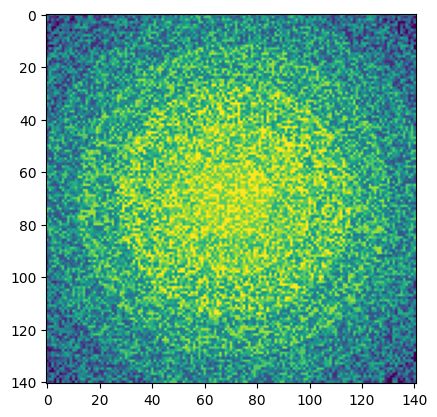

In [297]:
from aocd import get_data
from field import Field
data = get_data(day=17)
f = Field(data)
f.plot()

In [298]:
from queue import PriorityQueue
from marker import Marker
from typing import Tuple
from collections import defaultdict

# state
# (heat_loss, (x, y), facing, current_run_length)

queue = PriorityQueue()
queue.put((0, (0, 0), None, 0, [(0, 0)]))
# queue.put((0, (0, 0), None, 0))
bottom_right = (f.width - 1, f.height - 1)

opposite_dirs = {
  Direction.N: Direction.S,
  Direction.E: Direction.W,
  Direction.S: Direction.N,
  Direction.W: Direction.E,
  None: None
}

# map (pos, facing, run_length) -> best distance
distances = defaultdict(lambda: math.inf)

while not queue.empty():
  heat_loss: int
  pos: Tuple[int, int]
  facing: Direction
  run_length: int
  heat_loss, pos, facing, run_length, path = queue.get()

  if pos == bottom_right:
    print('ok', heat_loss, path)
    break

  # consider moving in each direction
  for d in range(4):
    # can't move backwards
    if d == opposite_dirs[facing]:
      continue
    moved_marker = Marker(pos, d)
    moved_marker.move()
    if moved_marker.is_inside(f):
      v = int(f.get(*moved_marker.pos))
      new_heat_loss = heat_loss + v
      # add to run length if not changing directions
      if d == facing:
        # can't move more than 3 tiles in a row
        if run_length < 3: # TODO check off by 1 error
          key = (moved_marker.pos, moved_marker.facing, run_length + 1)
          if new_heat_loss < distances[key]:
            # queue.put((new_heat_loss, moved_marker.pos, moved_marker.facing, run_length + 1))
            queue.put((new_heat_loss, moved_marker.pos, moved_marker.facing, run_length + 1, path[:] + [moved_marker.pos]))
            distances[key] = new_heat_loss
      else:
        key = (moved_marker.pos, moved_marker.facing, 1)
        if new_heat_loss < distances[key]:
          # queue.put((new_heat_loss, moved_marker.pos, moved_marker.facing, 0))
          queue.put((new_heat_loss, moved_marker.pos, moved_marker.facing, 1, path[:] + [moved_marker.pos]))
          distances[key] = new_heat_loss
        

ok 1238 [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (2, 6), (1, 6), (1, 7), (0, 7), (0, 8), (0, 9), (0, 10), (1, 10), (1, 11), (1, 12), (1, 13), (0, 13), (0, 14), (0, 15), (0, 16), (1, 16), (1, 17), (1, 18), (1, 19), (0, 19), (0, 20), (0, 21), (0, 22), (1, 22), (1, 23), (0, 23), (0, 24), (0, 25), (0, 26), (1, 26), (1, 27), (1, 28), (1, 29), (2, 29), (2, 30), (2, 31), (2, 32), (3, 32), (3, 33), (3, 34), (3, 35), (2, 35), (2, 36), (2, 37), (3, 37), (3, 38), (3, 39), (3, 40), (2, 40), (2, 41), (1, 41), (1, 42), (1, 43), (1, 44), (0, 44), (0, 45), (0, 46), (0, 47), (1, 47), (1, 48), (1, 49), (0, 49), (0, 50), (0, 51), (0, 52), (1, 52), (1, 53), (1, 54), (2, 54), (2, 55), (2, 56), (2, 57), (3, 57), (3, 58), (3, 59), (4, 59), (4, 60), (4, 61), (4, 62), (3, 62), (3, 63), (3, 64), (3, 65), (4, 65), (4, 66), (4, 67), (5, 67), (5, 68), (6, 68), (6, 69), (6, 70), (5, 70), (5, 71), (5, 72), (5, 73), (6, 73), (6, 74), (6, 75), (7, 75), (7, 76), (7, 77), (7, 78), (8, 78), (9, 78

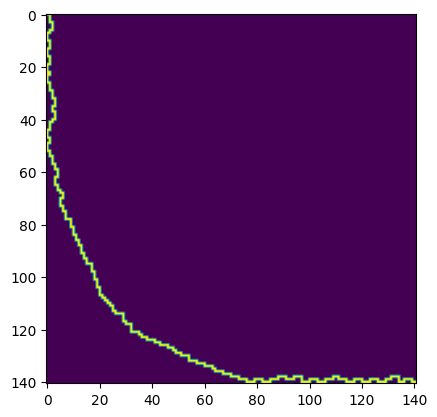

In [299]:
plot_xy_list(path)

In [300]:
from queue import PriorityQueue
from marker import Marker
from typing import Tuple
from collections import defaultdict

# state
# (heat_loss, (x, y), facing, current_run_length)

queue = PriorityQueue()
queue.put((0, (0, 0), None, 0, [(0, 0)]))
# queue.put((0, (0, 0), None, 0))
bottom_right = (f.width - 1, f.height - 1)

opposite_dirs = {
  Direction.N: Direction.S,
  Direction.E: Direction.W,
  Direction.S: Direction.N,
  Direction.W: Direction.E,
  None: None
}

# map (pos, facing, run_length) -> best distance
distances = defaultdict(lambda: math.inf)

while not queue.empty():
  heat_loss: int
  pos: Tuple[int, int]
  facing: Direction
  run_length: int
  heat_loss, pos, facing, run_length, path = queue.get()
  # heat_loss, pos, facing, run_length = queue.get()

  if pos == bottom_right:
    print('ok', heat_loss, path)
    break

  # consider moving in each direction
  for d in range(4):
    # can't move backwards
    if d == opposite_dirs[facing]:
      continue
    moved_marker = Marker(pos, d)
    moved_marker.move()
    if moved_marker.is_inside(f):
      v = int(f.get(*moved_marker.pos))
      new_heat_loss = heat_loss + v
      # add to run length if not changing directions
      if d == facing or facing is None:

        # can't move more than 10 tiles in a row
        if run_length < 10: # TODO check off by 1 error
          key = (moved_marker.pos, moved_marker.facing, run_length + 1)
          if new_heat_loss < distances[key]:
            # queue.put((new_heat_loss, moved_marker.pos, moved_marker.facing, run_length + 1))
            queue.put((new_heat_loss, moved_marker.pos, moved_marker.facing, run_length + 1, path[:] + [moved_marker.pos]))
            distances[key] = new_heat_loss
      else:
        # must move at least 4 tiles
        if run_length >= 4:
          key = (moved_marker.pos, moved_marker.facing, 1)
          if new_heat_loss < distances[key]:
            # queue.put((new_heat_loss, moved_marker.pos, moved_marker.facing, 0))
            queue.put((new_heat_loss, moved_marker.pos, moved_marker.facing, 1, path[:] + [moved_marker.pos]))
            distances[key] = new_heat_loss
        

ok 1362 [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 8), (2, 8), (3, 8), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (3, 12), (2, 12), (1, 12), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (1, 22), (2, 22), (3, 22), (4, 22), (4, 23), (4, 24), (4, 25), (4, 26), (4, 27), (4, 28), (4, 29), (4, 30), (4, 31), (4, 32), (3, 32), (2, 32), (1, 32), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (1, 37), (2, 37), (3, 37), (4, 37), (4, 38), (4, 39), (4, 40), (4, 41), (4, 42), (4, 43), (4, 44), (4, 45), (4, 46), (3, 46), (2, 46), (1, 46), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (1, 56), (2, 56), (3, 56), (4, 56), (4, 57), (4, 58), (4, 59), (4, 60), (4, 61), (4, 62), (4, 63), (4, 64), (4, 65), (3, 65), (2, 65), (1, 65), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 71), (0, 72), (1, 72), (2, 72), (3, 72), (4, 72), (5, 72), (6, 72), (6, 73

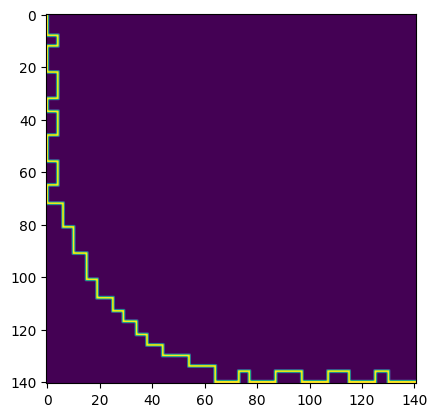

In [301]:
plot_xy_list(path)

# Day 18

I did part 1 using a naive flood fill, even though I knew part 2 wouldn't be so easy.

I googled the shoelace algorithm but it still didn't yield the right answer - I ended up cheating =_= and looking at reddit threads to understand that the algorithm doesn't include (half) the perimeter and I still need to add that on.

In [302]:
from aocd import get_data
data = get_data(day=18, block=True)
data

'L 7 (#357ea0)\nU 2 (#931393)\nL 4 (#3a7350)\nU 10 (#02c563)\nL 4 (#81f110)\nU 5 (#74d543)\nL 9 (#256002)\nU 6 (#708cf3)\nL 4 (#4c90e0)\nU 8 (#0ac253)\nL 8 (#4c90e2)\nU 5 (#693483)\nR 6 (#256000)\nU 6 (#27cc33)\nR 8 (#3bf170)\nU 3 (#376663)\nL 4 (#035da0)\nU 6 (#045753)\nL 10 (#826390)\nU 4 (#7a8c43)\nL 10 (#271b30)\nU 10 (#6d21f3)\nL 10 (#4a97c2)\nD 2 (#641f33)\nL 6 (#8468c2)\nD 3 (#4316e3)\nR 10 (#2dc6b2)\nD 11 (#5776a3)\nR 7 (#6319d0)\nD 7 (#6573e3)\nL 11 (#7e0de0)\nD 6 (#7d1f63)\nL 6 (#4c51e2)\nD 5 (#5de033)\nL 5 (#59cb30)\nU 11 (#2bb943)\nL 3 (#434650)\nU 6 (#2bb941)\nL 8 (#20d440)\nU 6 (#3c4843)\nL 4 (#535852)\nD 6 (#818223)\nL 7 (#144d02)\nU 4 (#818221)\nL 3 (#564072)\nU 5 (#2e7f43)\nL 12 (#4c51e0)\nU 9 (#3b61d3)\nL 9 (#14d352)\nU 4 (#727ac3)\nL 7 (#2f39c2)\nU 7 (#0516d3)\nL 4 (#9d1aa2)\nU 4 (#22d7e3)\nR 9 (#321810)\nU 6 (#740ad3)\nR 5 (#4cfb40)\nD 7 (#740ad1)\nR 8 (#38f8c0)\nD 11 (#1f22e3)\nR 4 (#0e5630)\nU 18 (#62bcb3)\nR 3 (#292920)\nD 6 (#7b6263)\nR 3 (#0d3bd0)\nU 9 (#82c2b3

In [303]:
data = """R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)"""

In [304]:
from marker import Marker
from direction import Direction
from utils import plot_xy_list

visited = set()
visited.add((0, 0))
marker = Marker((0, 0))
for ins in data.split("\n"):
  d, num, col = ins.split()
  num = int(num)
  d = Direction.from_string(d)
  marker.facing = d
  for i in range(num):
    marker.move()
    visited.add(marker.pos)

maxx = max([x for x, y in visited])
maxy = max([y for x, y in visited])
minx = min([x for x, y in visited])
miny = min([y for x, y in visited])

filled = set()
to_fill = [(1, 1)]

while to_fill:
    pos = to_fill.pop(0)
    if pos in filled:
        continue
    filled.add(pos)
    for adj in Marker(pos).adjacent():
        x, y = adj
        if x < minx or y < miny or x >= maxx or y >= maxy:
            continue
        if adj in visited: # hit a wall
            pass
        else:
            to_fill.append(adj)

# inside = 0
# for (x, y), v in f.iterate():
#     if (x * 2, y * 2) in filled:
#         inside += 1

plot_xy_list(filled)
len(filled) + len(visited)


62

In [305]:
from direction import Direction
from marker import Marker

# just lazily import a library to do the shoelace formula
from shapely.geometry import Polygon

visited = [(0, 0)]
perimeter_len = 0
marker = Marker((0, 0))
for ins in data.split("\n"):
  d, num, col = ins.split()
  col = col.replace("(", "").replace(")", "").replace("#", "")
  d = int(col[-1])
  d = Direction.from_string("RDLU"[d])
  num = "0x" + col[:-1]
  num = int(num, 16)
  marker.move(d, num)
  perimeter_len += num
  visited.append(marker.pos)

p = Polygon(visited)
int(p.area + perimeter_len / 2 + 1)

952408144115

# Day 19

A nice recursion problem for part 2.

In [306]:
from aocd import get_data
data = get_data(day=19, block=True)

In [307]:
import re

workflows, ratings = data.split("\n\n")
wf = {}
for l in workflows.split("\n"):
  m = re.match(r"([a-z]+)\{([^\}]+)\}", l)
  if not m:
    raise
  key, rules = m.groups()
  wf[key] = []
  for r in rules.split(","):
    try:
      cond, result = r.split(':')
      wf[key].append((cond, result))
    except ValueError:
      wf[key].append(("True", r))

total = 0
for l in ratings.split("\n"):
  m = re.match(r"\{([^\}]+)\}", l)
  if not m:
    raise
  rr = m.group(1)
  x, m, a, s = 0, 0, 0, 0
  for rating in rr.split(","):
    # eval(rating)
    var, val = rating.split("=")
    if var == 'x':
      x = int(val)
    if var == 'm':
      m = int(val)
    if var == 'a':
      a = int(val)
    if var == 's':
      s = int(val)
    sc = x + m + a + s
  w = 'in'
  while True:
    for rule, result in wf[w]:
      if eval(rule):
        w = result
        break
    if result == 'R' or result == 'A':
      if result == 'A':
        total += sc
      break
total

434147

In [308]:
import numpy as np
from typing import Dict, Tuple

def count_all_combos(label: str, ranges: Dict[str, Tuple[int, int]]):
  if label == 'A':
    return np.prod([hi - lo + 1 for (lo, hi) in ranges.values()])
  if label == 'R':
    return 0

  count = 0
  for cond, result in wf[label]:
    if cond == 'True':
      count += count_all_combos(result, ranges)
    else:
      m = re.match(r"([xmas])([\<\>])(\d+)", cond)
      if not m:
        raise
      var, op, num = m.groups()
      num = int(num)
      lo, hi = ranges[var]
      
      if op == '<':
        # get the count having applied this condition
        narrowed_ranges = dict(ranges)
        narrowed_ranges[var] = (lo, num - 1)
        count += count_all_combos(result, narrowed_ranges)
        # update the ranges for the remaining conditions (the "else" case)
        ranges[var] = (num, hi)
      elif op == '>':
        narrowed_ranges = dict(ranges)
        narrowed_ranges[var] = (num + 1, hi)
        count += count_all_combos(result, narrowed_ranges)
        ranges[var] = (lo, num)
      else:
        raise
  return count

count_all_combos('in', {
  'x': (1, 4000),
  'm': (1, 4000),
  'a': (1, 4000),
  's': (1, 4000),
})

136146366355609

# Day 20

Start time: 17:01:11 AEDT 2023

4pm really is the worst time, I always have some other engagement at that time.

English comprehension test again for part 1, part 2 the trick is to understand that `rx` is the output of a conjunction of 4 inputs so the solution is the LCM of the ticks when those emit a HIGH.

In [309]:
from aocd import get_data
data = get_data(day=20)

In [310]:
from typing import List, Dict, Tuple
from enum import Enum
from collections import defaultdict

class Pulse(Enum):
  LOW = 0
  HIGH = 1

send_queue: List[Tuple["Module", Pulse, "Module"]]
send_queue = []

class Module(object):
  def __init__(self, type: str, label: str):
    self.type = type
    self.label = label
    self.outputs = []

  def add_output(self, module: "Module"):
    self.outputs.append(module)

  def add_input(self, src: "Module"):
    pass

  def recv(self, src: "Module", pulse: Pulse):
    # print(f"{src.label} -{pulse}-> {self.label} [{self.type}]")
    pass

class Broadcaster(Module):
  outputs: List[Module]
  def __init__(self):
    super().__init__('broadcaster', '')

  def press(self):
    # super().send(self, Pulse.LOW)
    for module in self.outputs:
      send_queue.append((self, Pulse.LOW, module))

class FlipFlop(Module):
  is_on: bool
  def __init__(self, label: str):
    super().__init__('FlipFlop', label)
    self.is_on = False
    
  """
  Flip-flop modules (prefix %) are either on or off; they are initially off. If a flip-flop module receives a high pulse, 
  it is ignored and nothing happens. However, if a flip-flop module receives a low pulse, it flips between on and off. If 
  it was off, it turns on and sends a high pulse. If it was on, it turns off and sends a low pulse.
  """
  def recv(self, src: Module, pulse: Pulse):
    super().recv(src, pulse)
    if pulse == Pulse.LOW:
      self.is_on = not self.is_on
      for module in self.outputs:
        send_queue.append((self, Pulse.HIGH if self.is_on else Pulse.LOW, module))
        # module.send(self, Pulse.HIGH if self.is_on else Pulse.LOW)
        
class Conjunction(Module):
  prev_inputs: Dict[str, Pulse]
  def __init__(self, label: str):
    super().__init__('Conjunction', label)
    self.prev_inputs = defaultdict(lambda: Pulse.LOW)

  """
  Conjunction modules (prefix &) remember the type of the most recent pulse received from each of their connected input modules; 
  they initially default to remembering a low pulse for each input. When a pulse is received, the conjunction module first updates 
  its memory for that input. Then, if it remembers high pulses for all inputs, it sends a low pulse; otherwise, it sends a high pulse.
  """
  def recv(self, src: Module, pulse: Pulse):
    super().recv(src, pulse)
    self.prev_inputs[src.label] = pulse
    all_high = all([pulse == Pulse.HIGH for pulse in self.prev_inputs.values()])
    for module in self.outputs:
      send_queue.append((self, Pulse.LOW if all_high else Pulse.HIGH, module))
      # module.send(self, Pulse.LOW if all_high else Pulse.HIGH)

  def add_input(self, src: Module):
    self.prev_inputs[src.label] = Pulse.LOW

modules = {}
for l in data.split("\n"):
  label, outs = l.split(' -> ')
  outs = outs.split(', ')
  if label == 'broadcaster':
    modules[label] = Broadcaster() 
  elif label[0] == '%':
    modules[label[1:]] = FlipFlop(label[1:])
  elif label[0] == '&':
    modules[label[1:]] = Conjunction(label[1:])
  else:
    raise

for l in data.split("\n"):
  label, outs = l.split(' -> ')
  if label != 'broadcaster':
    label = label[1:]
  outs = outs.split(', ')
  for out in outs:
    if out not in modules:
      modules[label].add_output(Module('Output', out))
    else:
      modules[label].add_output(modules[out])
      modules[out].add_input(modules[label])

def press():
  modules["broadcaster"].press()
  low, high = 1, 0 # 1 for the button press
  while send_queue:
    (src, pulse, dst) = send_queue.pop(0)
    if pulse == Pulse.LOW:
      low += 1
    if pulse == Pulse.HIGH:
      high += 1
    dst.recv(src, pulse)
  return low, high

total_low, total_high = 0, 0
for i in range(1000):
  low, high = press()
  total_low += low
  total_high += high
total_low, total_high, total_low * total_high

(16656, 42780, 712543680)

In [311]:
from typing import List, Dict, Tuple
from enum import Enum
from collections import defaultdict
import math

class Pulse(Enum):
  LOW = 0
  HIGH = 1

send_queue: List[Tuple["Module", Pulse, "Module"]]
send_queue = []

class Module(object):
  def __init__(self, type: str, label: str):
    self.type = type
    self.label = label
    self.outputs = []

  def add_output(self, module: "Module"):
    self.outputs.append(module)

  def add_input(self, src: "Module"):
    pass

  def recv(self, src: "Module", pulse: Pulse):
    # print(f"{src.label} -{pulse}-> {self.label} [{self.type}]")
    pass

class Broadcaster(Module):
  outputs: List[Module]
  def __init__(self):
    super().__init__('broadcaster', '')

  def press(self):
    # super().send(self, Pulse.LOW)
    for module in self.outputs:
      send_queue.append((self, Pulse.LOW, module))

class FlipFlop(Module):
  is_on: bool
  def __init__(self, label: str):
    super().__init__('FlipFlop', label)
    self.is_on = False
    
  """
  Flip-flop modules (prefix %) are either on or off; they are initially off. If a flip-flop module receives a high pulse, 
  it is ignored and nothing happens. However, if a flip-flop module receives a low pulse, it flips between on and off. If 
  it was off, it turns on and sends a high pulse. If it was on, it turns off and sends a low pulse.
  """
  def recv(self, src: Module, pulse: Pulse):
    super().recv(src, pulse)
    if pulse == Pulse.LOW:
      self.is_on = not self.is_on
      for module in self.outputs:
        send_queue.append((self, Pulse.HIGH if self.is_on else Pulse.LOW, module))
        # module.send(self, Pulse.HIGH if self.is_on else Pulse.LOW)
        
class Conjunction(Module):
  prev_inputs: Dict[str, Pulse]
  def __init__(self, label: str):
    super().__init__('Conjunction', label)
    self.prev_inputs = defaultdict(lambda: Pulse.LOW)

  """
  Conjunction modules (prefix &) remember the type of the most recent pulse received from each of their connected input modules; 
  they initially default to remembering a low pulse for each input. When a pulse is received, the conjunction module first updates 
  its memory for that input. Then, if it remembers high pulses for all inputs, it sends a low pulse; otherwise, it sends a high pulse.
  """
  def recv(self, src: Module, pulse: Pulse):
    super().recv(src, pulse)
    self.prev_inputs[src.label] = pulse
    all_high = all([pulse == Pulse.HIGH for pulse in self.prev_inputs.values()])
    for module in self.outputs:
      send_queue.append((self, Pulse.LOW if all_high else Pulse.HIGH, module))
      # module.send(self, Pulse.LOW if all_high else Pulse.HIGH)

  def add_input(self, src: Module):
    self.prev_inputs[src.label] = Pulse.LOW

modules = {}
for l in data.split("\n"):
  label, outs = l.split(' -> ')
  outs = outs.split(', ')
  if label == 'broadcaster':
    modules[label] = Broadcaster() 
  elif label[0] == '%':
    modules[label[1:]] = FlipFlop(label[1:])
  elif label[0] == '&':
    modules[label[1:]] = Conjunction(label[1:])
  else:
    raise

for l in data.split("\n"):
  label, outs = l.split(' -> ')
  if label != 'broadcaster':
    label = label[1:]
  outs = outs.split(', ')
  for out in outs:
    if out not in modules:
      modules[label].add_output(Module('Output', out))
    else:
      modules[label].add_output(modules[out])
      modules[out].add_input(modules[label])

def go():
  i = 0
  highs = {}
  while True:
    i += 1
    modules["broadcaster"].press()  
    while send_queue:
      (src, pulse, dst) = send_queue.pop(0)
      dst.recv(src, pulse)
      if dst.label == 'rx':
        for prev in src.prev_inputs:
          if src.prev_inputs[prev] == Pulse.HIGH:
            highs[prev] = i
            if set(highs.keys()) == set(src.prev_inputs.keys()):
              return highs
highs = go()
math.lcm(*highs.values())

238920142622879

# Day 21

Part 1 is straightforward.

Part 2, I could tell it was some kind of extrapolation based on how many units of the original map we extend beyond -- given `26501365` is `202300 * 131 + 65` where `131` is the size of the map and `65` is half (excluding origin).

However initial attempts to use https://en.wikipedia.org/wiki/Centered_square_number failed me.

Eventually I figured it was some kind of quadratic sequence since the progression is constant when differentiated twice.

```
f(131n + 65) = 3606, 32258, 89460, 175212 ... for n = 0, 1, 2, 3, ...
```

In [312]:
from aocd import get_data
data = get_data(day=21, block=True)
from field import Field
f = Field(data)
f.plot()

s = list(f.find('S'))[0]
gardens = set(f.find('.'))
gardens.add(s)
len(gardens)

def tick(curr):
  next = set()
  for p in curr:
    m = Marker(p)
    for pp in m.adjacent():
      if pp in gardens:
        next.add(pp)
  return next

curr = set([s])
for i in range(64):
  curr = tick(curr)

len(curr)

3503

In [313]:
from marker import Marker

def tick(curr):
  next = set()
  for p in curr:
    m = Marker(p)
    for (x, y) in m.adjacent():
      v = f.get(x % f.width, y % f.height)
      if v == '.' or v == 'S':
        next.add((x, y))
  return next

# print out the first 4 values of the sequence f(131n + 65)
for j in range(4):
  middleset = set([s])
  for i in range(65 + j * 131):
    middleset = tick(middleset)
  print(j, len(middleset))

0 3606
1 32258
2 89460
3 175212


In [314]:
# extrapolate for n = 26501365 // 131 + 1
seq = [3606, 32258, 89460, 175212]
n = 26501365 // 131 + 1 # +1 because our sequence starts at n = 0

seq2 = []
for i in range(len(seq) -1):
  seq2.append(seq[i+1]-seq[i])

seq3 = []
for i in range(len(seq2) -1):
  seq3.append(seq2[i+1]-seq2[i])

# since seq3 is constant, we can assume this is quadratic and extrapolate 
print(seq2, seq3)

# https://www.onlinemathlearning.com/quadratic-sequences.html
# 2a = seq3[0]
# 3a + b = seq2[0]
# a + b + c = seq[0]

a = seq3[0] // 2
b = seq2[0] - 3 * a
c = seq[0] - a - b
print('a', a, 'b', b, 'c', c)

a * n ** 2 + b * n + c

[28652, 57202, 85752] [28550, 28550]
a 14275 b -14173 c 3504


584211423220706

# Day 22

Super inefficient part 1... but a solve is a solve!

In [315]:
from aocd import get_data
data = get_data(day=22, block=True)

bricks = []
for brickdef in data.split("\n"):
  v0, v1 = brickdef.split("~")
  x0, y0, z0 = [int(p) for p in v0.split(",")]
  x1, y1, z1 = [int(p) for p in v1.split(",")]
  brick = []
  for x in range(min(x0, x1), max(x0, x1) + 1):
    for y in range(min(y0, y1), max(y0, y1) + 1):
      for z in range(min(z0, z1), max(z0, z1) + 1):
        brick.append((x, y, z))
  bricks.append(brick)

# sort bricks from lowest to highest
bricks.sort(key=lambda b: min([z for (x, y, z) in b]))

# drop each brick
final = set()
dropped_bricks = []
for i, b in enumerate(bricks):
  # try drop by 1
  drop = 1
  ok_to_drop = True
  while ok_to_drop:
    for x, y, z in b:
      if z - drop <= 0:
        # hit ground
        ok_to_drop = False
        break
      if (x, y, z - drop) in final:
        # hit another brick
        ok_to_drop = False
        break
    if ok_to_drop:    
      drop += 1
  drop -= 1
  for x, y, z in b:
    final.add((x, y, z - drop))
  # bricks[i] = [(x, y, z - drop) for (x, y, z) in brick]
  dropped_bricks.append([(x, y, z - drop) for (x, y, z) in b])
  # print(i, drop)

d = 0
for i, disintegrated in enumerate(dropped_bricks):
  can_disintegrate = True
  # print('checking if ', disintegrated, 'can be disintegrated', i, len(dropped_bricks))
  for j, brick in enumerate(dropped_bricks):
    # print('  checking if', brick, 'can fall')
    if i == j:
      continue
    final_copy = set(final)
    # remove disintegrated
    for p in disintegrated:
      final_copy.remove(p)
    for p in brick:
      final_copy.remove(p)
    # check if this brick can fall 1 if ignoreing disintegrated
    can_fall = True
    for x, y, z in brick:
      if z - 1 == 0 or (x, y, z - 1) in final_copy:
        # print('  cannot fall because', (x, y, z), final_copy)
        can_fall = False
        break
    # print('j', j, 'can fall?', can_fall)
    if can_fall:
      # print('  can fall')
      can_disintegrate = False
      break
  # print('>>>', i, can_disintegrate)
  if can_disintegrate:
    d += 1
d

517

In [316]:
def count_dropped_bricks(bricks):
  settled = set()
  bricks.sort(key=lambda b: min([z for (x, y, z) in b]))
  # dropped_bricks = []
  count = 0
  for b in bricks:
    # try drop by 1
    drop = 1
    ok_to_drop = True
    while ok_to_drop:
      for x, y, z in b:
        if z - drop <= 0:
          # hit ground
          ok_to_drop = False
          break
        if (x, y, z - drop) in settled:
          # hit another brick
          ok_to_drop = False
          break
      if ok_to_drop:    
        drop += 1
    drop -= 1
    for x, y, z in b:
      settled.add((x, y, z - drop))
      # bricks[i] = [(x, y, z - drop) for (x, y, z) in brick]
    # dropped_bricks.append([(x, y, z - drop) for (x, y, z) in b])
    if drop > 0:
      count += 1
  return count

c = 0
for i,_ in enumerate(dropped_bricks):
  cop = dropped_bricks[:]
  del cop[i]
  c += count_dropped_bricks(cop)
c

61276

# Day 23

Christmas service at church, did not start until `Sun Dec 24 00:30:52 AEDT 2023` and exhausted...

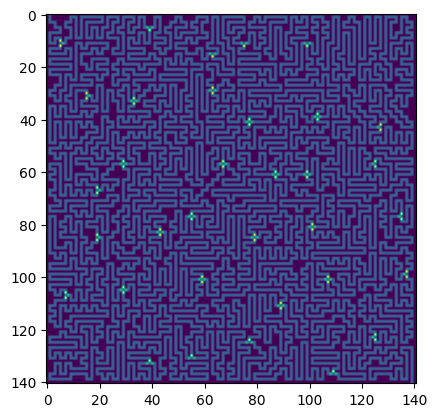

In [317]:
from aocd import get_data
from field import Field
data = get_data(day=23)
f = Field(data)
f.plot()

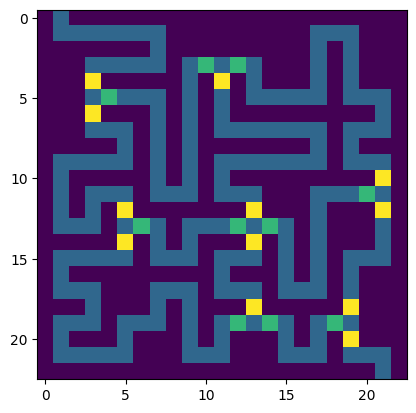

In [318]:
data = """#.#####################
#.......#########...###
#######.#########.#.###
###.....#.>.>.###.#.###
###v#####.#v#.###.#.###
###.>...#.#.#.....#...#
###v###.#.#.#########.#
###...#.#.#.......#...#
#####.#.#.#######.#.###
#.....#.#.#.......#...#
#.#####.#.#.#########v#
#.#...#...#...###...>.#
#.#.#v#######v###.###v#
#...#.>.#...>.>.#.###.#
#####v#.#.###v#.#.###.#
#.....#...#...#.#.#...#
#.#########.###.#.#.###
#...###...#...#...#.###
###.###.#.###v#####v###
#...#...#.#.>.>.#.>.###
#.###.###.#.###.#.#v###
#.....###...###...#...#
#####################.#"""
f = Field(data)
f.plot()

In [319]:
# just bruteforce using networkx

import networkx as nx
from direction import Direction

G = f.nx_maze().to_directed()
for p, v in f.iterate():
  if v == '.':
    if p[1] == 0:
      start = p
    elif p[1] == f.height - 1:
      end = p
  elif v == '#':
    pass
  else:
    opposite_dir = {
      'v': Direction.N,
      '^': Direction.S,
      '>': Direction.W,
      '<': Direction.E,
    }[v]
    p1 = Marker(p).relative_pos(opposite_dir)
    G.remove_edge(p, p1)

paths = nx.all_simple_edge_paths(G, start, end)
max([len(p) for p in paths])

94

In [320]:
# to simplify the graph, we can collapse all the long corridors into a single edge with weight
G = f.nx_maze()
for n in list(G.nodes):
  adj = list(G.neighbors(n))
  if len(adj) == 2:
    p, q = adj
    pw = G.edges[n, p].get("weight", 1)
    qw = G.edges[n, q].get("weight", 1)
    # delete the node, then join the 2 ends
    G.remove_node(n)
    G.add_edge(p, q, weight=pw + qw)

paths = nx.all_simple_edge_paths(G, start, end)
max([sum(G.edges[e]["weight"] for e in path) for path in paths])

154

# Day 24

Part 1 is straightforward. Part 2 I tried using `sympy` but it didn't give me a solution, then switched to `z3` and it did. :shrug:

TBH not sure what clever approach we're meant to take here.

In [321]:
from itertools import combinations
from aocd import get_data
data = get_data(day=24)
lines = []
for l in data.split("\n"):
  pos, vel = l.split(" @ ")
  x, y, z = [int(n) for n in pos.split(", ")]
  dx, dy, dz = [int(n) for n in vel.split(", ")]
  # ax + by + c = 0
  m = dy / dx
  c = y - m * x
  # print(f'y = {m} * x + {c}')
  lines.append(((m, c), (x, dx)))
  # y' = gradient * x' + (y - gradient * x)

def find_intersection(mc0, mc1):
  m0, c0 = mc0
  m1, c1 = mc1
  # m0 * x + c0 = m1 * x + c1
  # m0 * x = + c1 - c0
  # m0 * x - m1 * x = c1 - c0
  try:
    x = (c1 - c0) / (m0 - m1)
  except ZeroDivisionError:
    return None
  # x = (m1 * x + c1 - c0) / m0
  y = m0 * x + c0
  return (x, y)
  # print(mc0, mc1, x, y)


limits = (200000000000000, 400000000000000)
c = 0
for (a, b) in combinations(lines, 2):
  mc0, xdx0 = a
  mc1, xdx1 = b
  inters = find_intersection(mc0, mc1)
  if inters is None:
    continue
  x, y = inters
  x0, dx0 = xdx0
  x1, dx1 = xdx1

  # check if in the past
  if (x - x0) / dx0 < 0:
    # print('past for a')
    continue    
  if (x - x1) / dx1 < 0:
    # print('past for b')
    continue
  if limits[0] < x < limits[1] and limits[0] < y < limits[1]:
    # print(x, y)
    c += 1

c

18651

In [322]:
### sympy attempt that failed
# part 2 thoughts
# dimension can be treated completely separately, ie we can solve purely for x first?
# actually no, the t of intersections have to match

# each line can be broken down into
# x = x0 + t * dx
# where x0 and dx is known
# and we want to solve for the rock
# Rx = Rx0 + t + Rdx 
# where Rx0 and Rdx is unknown
import sympy as sym
xi, yi, zi, dxi, dyi, dzi = sym.symbols('xi,yi,zi,dxi,dyi,dzi')

eqs = []
for i, l in enumerate(data.split("\n")):
  pos, vel = l.split(" @ ")
  t = sym.symbols(f't{i}')
  x0, y0, z0 = [int(n) for n in pos.split(", ")]
  dx0, dy0, dz0 = [int(n) for n in vel.split(", ")]
  eqs.append(sym.Eq(xi + t * dxi, x0 + t * dx0))
  eqs.append(sym.Eq(yi + t * dyi, y0 + t * dy0))
  eqs.append(sym.Eq(zi + t * dzi, z0 + t * dz0))

# eqs.append(sym.Eq(x, xi + t * dxi))
# eqs.append(sym.Eq(y, yi + t * dyi))
# eqs.append(sym.Eq(z, zi + t * dzi))
result = sym.solve(eqs, (xi, yi, zi, dxi, dyi, dzi))
result

[]

In [323]:
### z3 attempt that worked
import z3
solver = z3.Solver()
x = z3.Real('x')
y = z3.Real('y')
z = z3.Real('z')
dx = z3.Real('dx')
dy = z3.Real('dy')
dz = z3.Real('dz')

eqs = []
for i, l in enumerate(data.split("\n")):
  pos, vel = l.split(" @ ")
  x0, y0, z0 = [int(n) for n in pos.split(", ")]
  dx0, dy0, dz0 = [int(n) for n in vel.split(", ")]
  t = z3.Real(f't{i}')
  solver.add(x + t * dx == x0 + t * dx0)
  solver.add(y + t * dy == y0 + t * dy0)
  solver.add(z + t * dz == z0 + t * dz0)
if solver.check() == z3.sat:
  m = solver.model()
  print(m[x].as_long() + m[y].as_long() + m[z].as_long())
  

546494494317645


# Day 25

Merry Christmas!

I googled some algorithms for finding the significant edges in a graph and it pointed me to https://en.wikipedia.org/wiki/Girvan%E2%80%93Newman_algorithm, which happens to have an implementation in `networkx`, which led to an almost "cheat" solution.

In [335]:
from aocd import get_data
import networkx as nx
data = get_data(day=25)
G = nx.Graph()
for l in data.split("\n"):
  src, dsts = l.split(": ")
  for dst in dsts.split():
    G.add_edge(src, dst)
parts = next(nx.community.girvan_newman(G))
len(parts[0]) * len(parts[1])

525264